In [1]:
import kts
kts.config.storage_path = "/mnt/tenTB/avalur/santander_storage/"

In [2]:
from kts.validation.validator import *
from kts.validation.split import *
from kts.zoo.binary_classification import *
from kts.feature import stl
from kts.feature.decorators import *
from kts.optimization.optimizer import *
from kts.feature.storage import feature_list as features
from kts.feature.storage import FeatureSet
from kts.validation.experiment import experiment_list as experiments
from kts.storage.cache_utils import clear_storage

In [9]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm as tm
from tqdm import trange

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
%%time
train = pd.read_csv('../input/train.csv.zip')
train = train.set_index('ID_code')
test = pd.read_csv('../input/test.csv.zip')
test = test.set_index('ID_code')

CPU times: user 11.7 s, sys: 1.74 s, total: 13.4 s
Wall time: 23.9 s


In [11]:
def invert_peaks(peak_mask, filter_size):
    n = 200000
    res = np.zeros(n, dtype=np.bool)
    for i in range(n - filter_size + 1):
        res[i : i + filter_size] |= peak_mask[i]
    return res


  0%|          | 0/200 [00:00<?, ?it/s]

var_0
var_0 0.020463850154871475


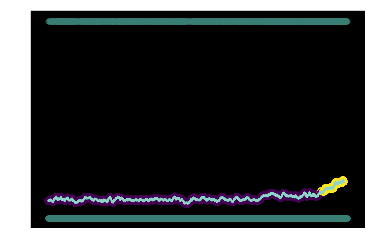

0.15615933943316224 0.09500977613743711



  0%|          | 1/200 [00:07<26:27,  7.98s/it]

var_1
var_1 0.01934805500816942


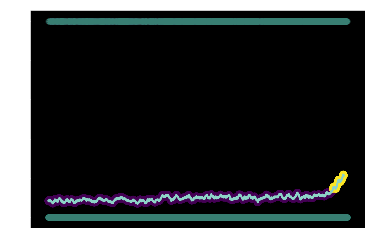

0.17525662959794697 0.0968224161806051



  1%|          | 2/200 [00:15<26:02,  7.89s/it]

var_2
var_2 0.02129798466391494


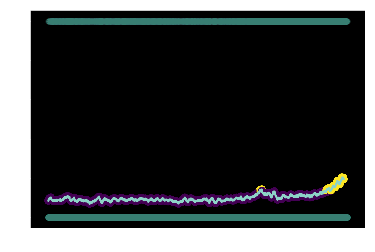

0.15670125734365564 0.0948582681929951



  2%|▏         | 3/200 [00:26<28:18,  8.62s/it]

var_3



  2%|▏         | 4/200 [00:26<19:58,  6.11s/it]

var_4



  2%|▎         | 5/200 [00:26<14:09,  4.36s/it]

var_5
var_5 0.01448920495110534


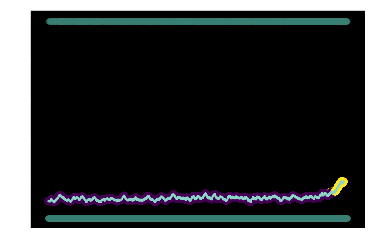

0.1514288426848951 0.09765816738534942



  3%|▎         | 6/200 [00:34<17:26,  5.39s/it]

var_6
var_6 0.02363717212510531


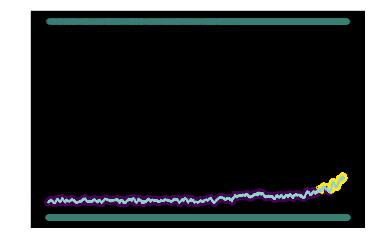

0.16214140749273215 0.09430650991093091



  4%|▎         | 7/200 [00:42<19:34,  6.08s/it]

var_7



  4%|▍         | 8/200 [00:42<13:52,  4.33s/it]

var_8



  4%|▍         | 9/200 [00:42<09:53,  3.11s/it]

var_9
var_9 0.017878995358554903


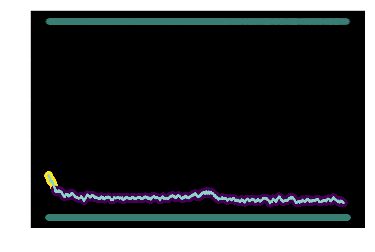

0.18076802997190133 0.09783361054578138



  5%|▌         | 10/200 [00:50<14:13,  4.49s/it]

var_10



  6%|▌         | 11/200 [00:50<10:08,  3.22s/it]

var_11



  6%|▌         | 12/200 [00:50<07:18,  2.33s/it]

var_12
var_12 0.026657419539599585


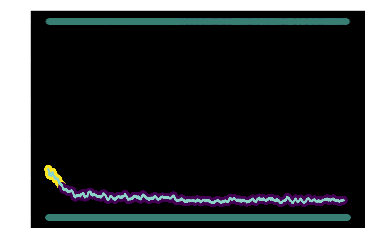

0.19952990336902585 0.09445502432193005



  6%|▋         | 13/200 [00:58<12:16,  3.94s/it]

var_13
var_13 0.021039921606803236


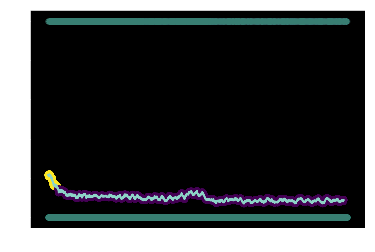

0.18081052996189817 0.09685427435075965



  7%|▋         | 14/200 [01:06<15:43,  5.07s/it]

var_14



  8%|▊         | 15/200 [01:06<11:10,  3.63s/it]

var_15



  8%|▊         | 16/200 [01:06<08:00,  2.61s/it]

var_16



  8%|▊         | 17/200 [01:06<05:48,  1.90s/it]

var_17



  9%|▉         | 18/200 [01:07<04:16,  1.41s/it]

var_18
var_18 0.016673575972669302


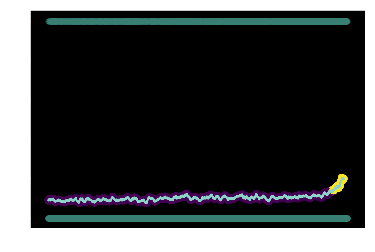

0.1594873620505518 0.0969782373757708



 10%|▉         | 19/200 [01:14<09:59,  3.31s/it]

var_19



 10%|█         | 20/200 [01:15<07:11,  2.40s/it]

var_20
var_20 0.010569532765414169


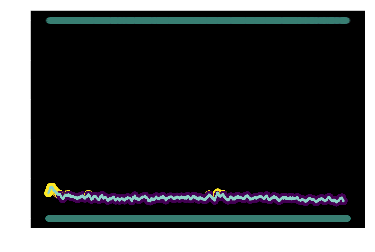

0.12203499414070393 0.09744768991115701



 10%|█         | 21/200 [01:22<11:53,  3.99s/it]

var_21
var_21 0.021777696187452854


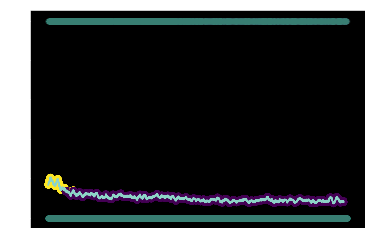

0.1581717123935667 0.0951618893646771



 11%|█         | 22/200 [01:30<15:08,  5.11s/it]

var_22
var_22 0.022493311855853883


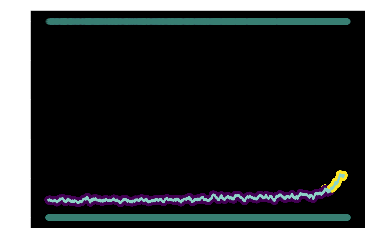

0.17693930161706117 0.09526226101635159



 12%|█▏        | 23/200 [01:38<17:23,  5.90s/it]

var_23
var_23 0.010823100126916842


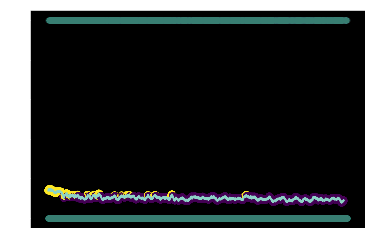

0.11317442560881164 0.09529581732971563



 12%|█▏        | 24/200 [01:46<19:01,  6.48s/it]

var_24
var_24 0.012399394877925523


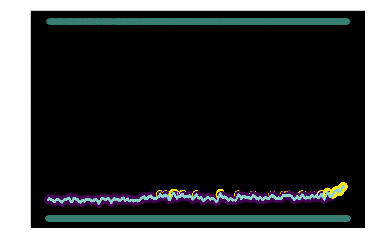

0.11740177262893432 0.09369656023099997



 12%|█▎        | 25/200 [01:53<20:00,  6.86s/it]

var_25



 13%|█▎        | 26/200 [01:54<14:08,  4.88s/it]

var_26
var_26 0.024410179258430423


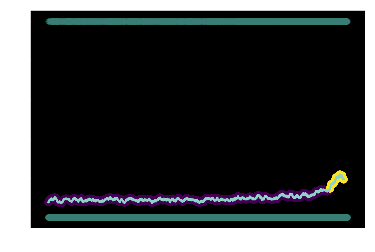

0.1875 0.09532057801508602



 14%|█▎        | 27/200 [02:02<16:37,  5.76s/it]

var_27



 14%|█▍        | 28/200 [02:02<11:46,  4.11s/it]

var_28
var_28 0.01096853142557238


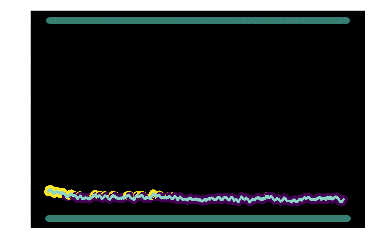

0.1138647766186191 0.09437014903618408



 14%|█▍        | 29/200 [02:09<14:47,  5.19s/it]

var_29



 15%|█▌        | 30/200 [02:10<10:30,  3.71s/it]

var_30



 16%|█▌        | 31/200 [02:10<07:31,  2.67s/it]

var_31
var_31 0.011274488229782003


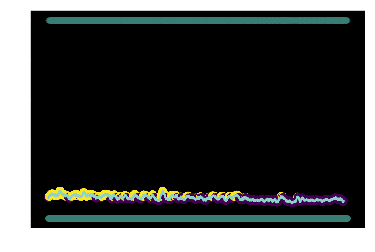

0.10802911434423906 0.08831566148495823



 16%|█▌        | 32/200 [02:18<11:40,  4.17s/it]

var_32
var_32 0.013420266904445538


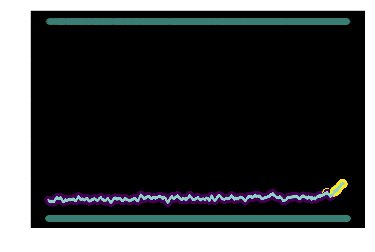

0.14383142432456064 0.09786119228056406



 16%|█▋        | 33/200 [02:25<14:32,  5.23s/it]

var_33
var_33 0.018022634480293415


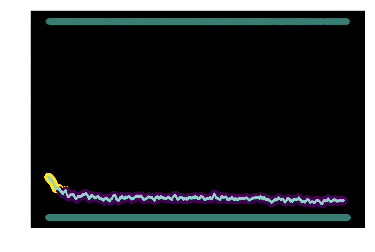

0.1622392438070404 0.09645337935736811



 17%|█▋        | 34/200 [02:33<16:31,  5.98s/it]

var_34
var_34 0.019123853441205974


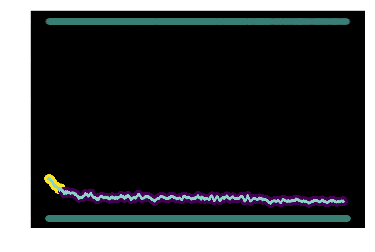

0.1632937320770176 0.09640831758034027



 18%|█▊        | 35/200 [02:41<17:53,  6.51s/it]

var_35
var_35 0.014528318113754045


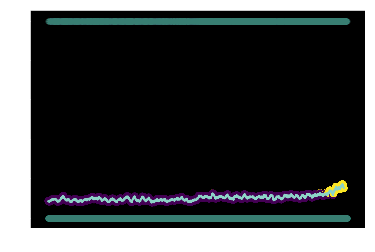

0.13462482946793997 0.09704692445300674



 18%|█▊        | 36/200 [02:48<18:44,  6.86s/it]

var_36
var_36 0.014917940596643637


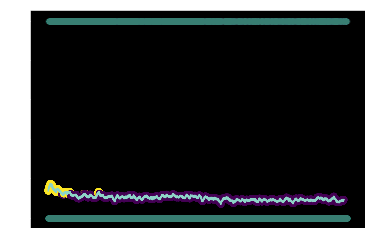

0.12979616306954436 0.09661586884651963



 18%|█▊        | 37/200 [02:56<19:18,  7.11s/it]

var_37



 19%|█▉        | 38/200 [02:56<13:38,  5.05s/it]

var_38



 20%|█▉        | 39/200 [02:57<09:40,  3.61s/it]

var_39



 20%|██        | 40/200 [02:57<06:56,  2.60s/it]

var_40
var_40 0.01952273314907883


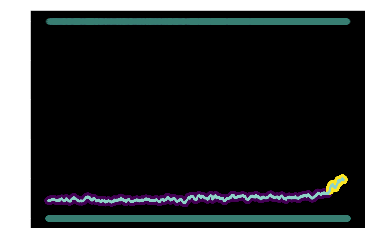

0.16931079323797138 0.09627782346854853



 20%|██        | 41/200 [03:05<10:55,  4.13s/it]

var_41



 21%|██        | 42/200 [03:05<07:47,  2.96s/it]

var_42



 22%|██▏       | 43/200 [03:05<05:37,  2.15s/it]

var_43
var_43 0.012150082788746068


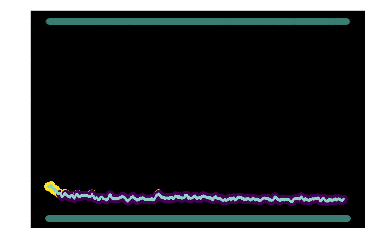

0.1303515664349753 0.09719893863865975



 22%|██▏       | 44/200 [03:13<09:53,  3.81s/it]

var_44
var_44 0.01999522709663624


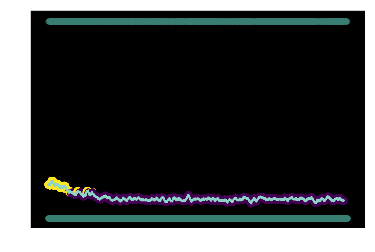

0.14551961166424549 0.09309162460632099



 22%|██▎       | 45/200 [03:20<12:50,  4.97s/it]

var_45



 23%|██▎       | 46/200 [03:21<09:07,  3.55s/it]

var_46



 24%|██▎       | 47/200 [03:21<06:32,  2.56s/it]

var_47



 24%|██▍       | 48/200 [03:21<04:44,  1.87s/it]

var_48
var_48 0.012347132932273555


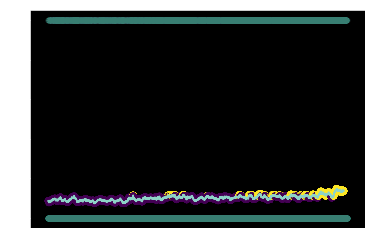

0.11322345129874341 0.09249961346602976



 24%|██▍       | 49/200 [03:29<09:09,  3.64s/it]

var_49
var_49 0.012663691500240928


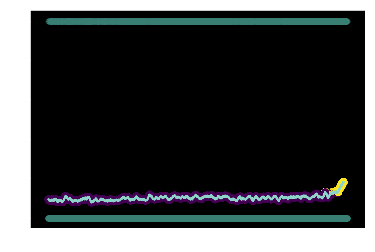

0.14124979763639306 0.0978065079991047



 25%|██▌       | 50/200 [03:37<12:08,  4.86s/it]

var_50



 26%|██▌       | 51/200 [03:37<08:37,  3.48s/it]

var_51
var_51 0.012044767324729143


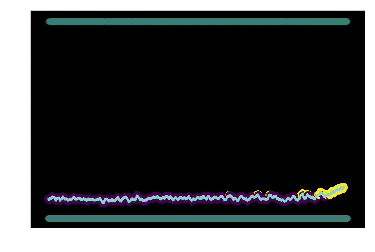

0.12211810612514083 0.09567933304402569



 26%|██▌       | 52/200 [03:45<11:38,  4.72s/it]

var_52
var_52 0.011873563204707673


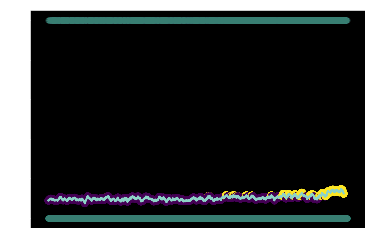

0.11381388409443291 0.09357005029095826



 26%|██▋       | 53/200 [03:52<13:46,  5.62s/it]

var_53
var_53 0.02514475626461124


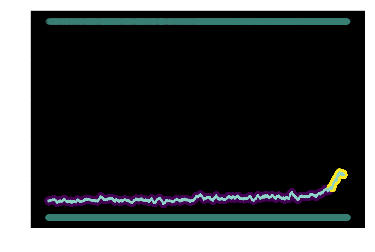

0.19265552206083858 0.09515321100432154



 27%|██▋       | 54/200 [04:00<15:18,  6.29s/it]

var_54



 28%|██▊       | 55/200 [04:00<10:50,  4.49s/it]

var_55



 28%|██▊       | 56/200 [04:01<07:43,  3.22s/it]

var_56
var_56 0.013759693516564727


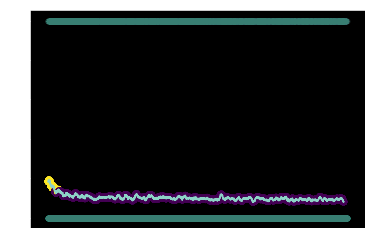

0.15363823116012543 0.09791298603939166



 28%|██▊       | 57/200 [04:10<11:50,  4.97s/it]

var_57



 29%|██▉       | 58/200 [04:10<08:25,  3.56s/it]

var_58
var_58 0.010921498891715006


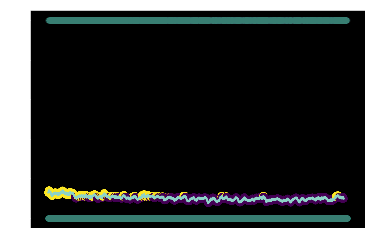

0.10970392646871956 0.09224735705354098



 30%|██▉       | 59/200 [04:18<11:50,  5.04s/it]

var_59



 30%|███       | 60/200 [04:19<08:25,  3.61s/it]

var_60



 30%|███       | 61/200 [04:19<06:02,  2.61s/it]

var_61



 31%|███       | 62/200 [04:19<04:22,  1.90s/it]

var_62



 32%|███▏      | 63/200 [04:20<03:12,  1.41s/it]

var_63



 32%|███▏      | 64/200 [04:20<02:24,  1.06s/it]

var_64



 32%|███▎      | 65/200 [04:20<01:50,  1.22it/s]

var_65



 33%|███▎      | 66/200 [04:20<01:27,  1.53it/s]

var_66



 34%|███▎      | 67/200 [04:21<01:11,  1.87it/s]

var_67
var_67 0.016461249110487436


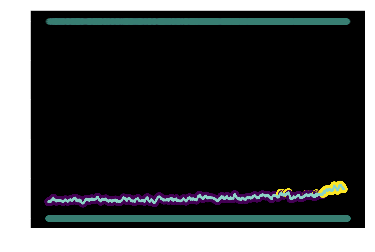

0.13112122899538145 0.09497200110933433



 34%|███▍      | 68/200 [04:29<06:39,  3.03s/it]

var_68



 34%|███▍      | 69/200 [04:30<04:50,  2.22s/it]

var_69



 35%|███▌      | 70/200 [04:30<03:31,  1.63s/it]

var_70
var_70 0.011442190765846844


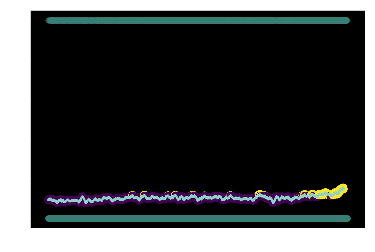

0.1154892544780616 0.09483381876019913



 36%|███▌      | 71/200 [04:39<08:04,  3.76s/it]

var_71
var_71 0.012709387378842035


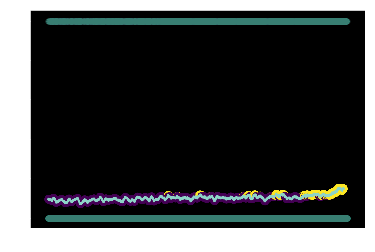

0.11456556178406044 0.09361230201262355



 36%|███▌      | 72/200 [04:47<10:39,  5.00s/it]

var_72



 36%|███▋      | 73/200 [04:47<07:33,  3.57s/it]

var_73



 37%|███▋      | 74/200 [04:47<05:24,  2.57s/it]

var_74



 38%|███▊      | 75/200 [04:47<03:54,  1.88s/it]

var_75
var_75 0.015497201072975218


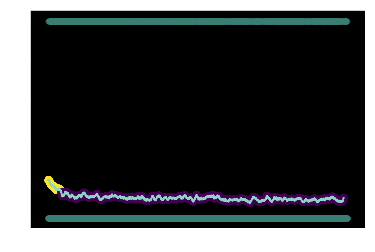

0.15221518987341773 0.09700042698548249



 38%|███▊      | 76/200 [04:55<07:28,  3.62s/it]

var_76
var_76 0.02226810531868491


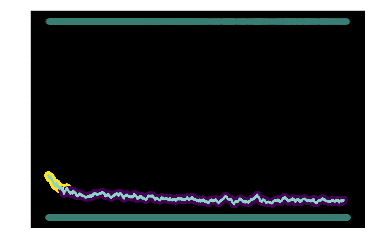

0.1645831940637743 0.09530860728162947



 38%|███▊      | 77/200 [05:03<09:58,  4.86s/it]

var_77



 39%|███▉      | 78/200 [05:03<07:05,  3.49s/it]

var_78
var_78 0.019919245170905698


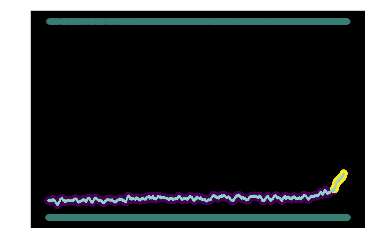

0.18532634587899 0.09677250996847665



 40%|███▉      | 79/200 [05:11<09:38,  4.78s/it]

var_79



 40%|████      | 80/200 [05:11<06:50,  3.42s/it]

var_80
var_80 0.023171566309840286


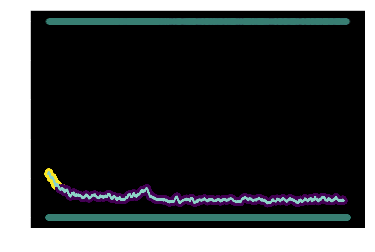

0.17982149107455372 0.09568228581125511



 40%|████      | 81/200 [05:19<09:19,  4.70s/it]

var_81
var_81 0.03187476800074493


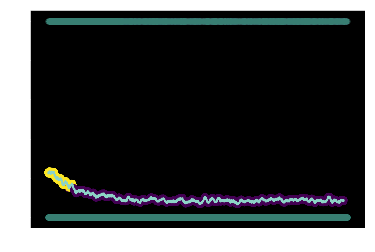

0.19055469871828964 0.0911438931108131



 41%|████      | 82/200 [05:26<11:00,  5.60s/it]

var_82
var_82 0.01045302807863669


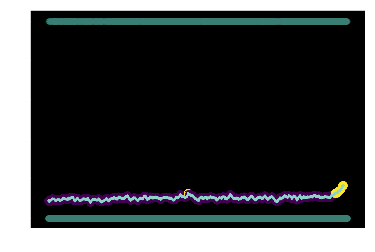

0.13199577613516367 0.0985919972857779



 42%|████▏     | 83/200 [05:34<12:06,  6.21s/it]

var_83
var_83 0.010293404634407814


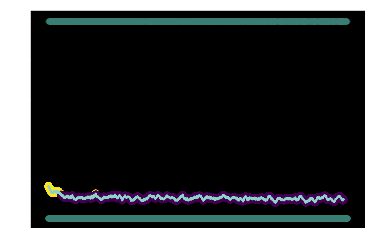

0.13052239962796466 0.09841901035820799



 42%|████▏     | 84/200 [05:42<12:49,  6.64s/it]

var_84



 42%|████▎     | 85/200 [05:42<09:02,  4.72s/it]

var_85
var_85 0.01075463719688404


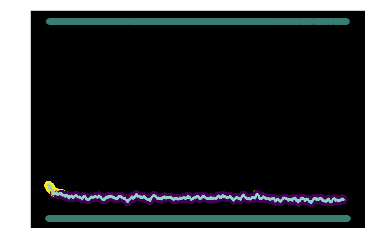

0.13134420178406644 0.09834434961175641



 43%|████▎     | 86/200 [05:50<10:39,  5.61s/it]

var_86
var_86 0.01606576190157711


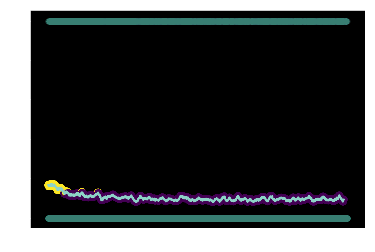

0.1396758407039914 0.09557917480180277



 44%|████▎     | 87/200 [05:57<11:43,  6.23s/it]

var_87
var_87 0.014898294415305418


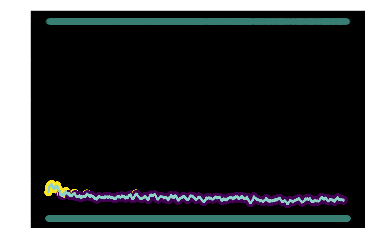

0.12975792988313856 0.09650647580095432



 44%|████▍     | 88/200 [06:05<12:27,  6.68s/it]

var_88
var_88 0.01032781810620096


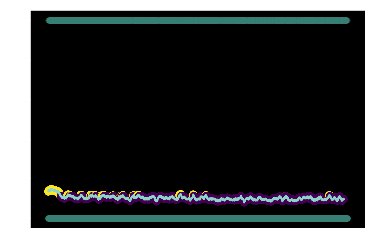

0.11440898876404494 0.09512727272727273



 44%|████▍     | 89/200 [06:13<12:53,  6.97s/it]

var_89
var_89 0.015314157945995036


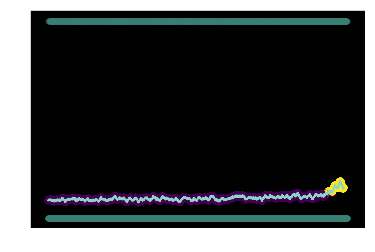

0.14994002399040385 0.09719192511800315



 45%|████▌     | 90/200 [06:21<13:14,  7.22s/it]

var_90
var_90 0.012030173165592026


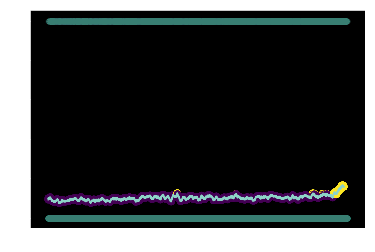

0.12612270113576962 0.09747592997200445



 46%|████▌     | 91/200 [06:28<13:22,  7.36s/it]

var_91
var_91 0.01584871732699526


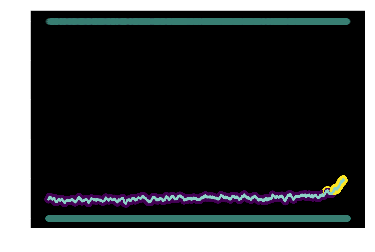

0.15148180174514583 0.09702636173836895



 46%|████▌     | 92/200 [06:36<13:23,  7.44s/it]

var_92
var_92 0.01932992731349664


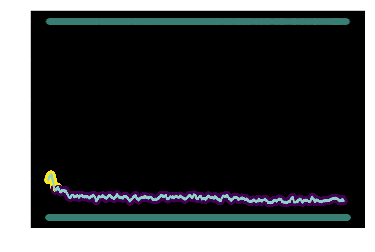

0.1718679330619629 0.09718763732239637



 46%|████▋     | 93/200 [06:44<13:24,  7.51s/it]

var_93
var_93 0.014044352966248182


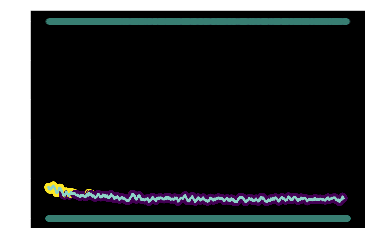

0.12990969036697247 0.09571983079211603



 47%|████▋     | 94/200 [06:51<13:22,  7.57s/it]

var_94
var_94 0.019281164949991367


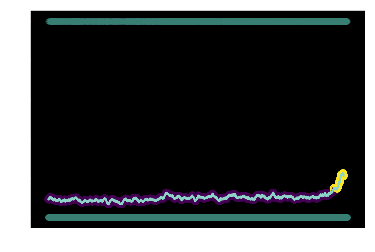

0.17725907094984977 0.09701796745163212



 48%|████▊     | 95/200 [06:59<13:17,  7.59s/it]

var_95
var_95 0.015421299327611831


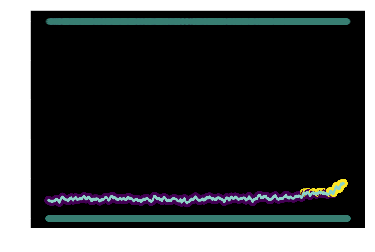

0.1335950044603033 0.09509521732810002



 48%|████▊     | 96/200 [07:07<13:11,  7.61s/it]

var_96



 48%|████▊     | 97/200 [07:07<09:16,  5.40s/it]

var_97



 49%|████▉     | 98/200 [07:07<06:33,  3.86s/it]

var_98



 50%|████▉     | 99/200 [07:07<04:40,  2.78s/it]

var_99
var_99 0.022146900256413467


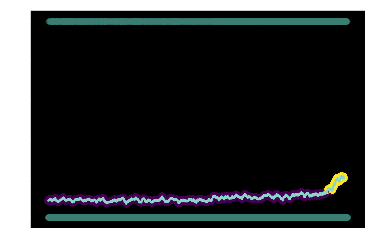

0.17343613385263493 0.09559329630400333



 50%|█████     | 100/200 [07:15<07:05,  4.26s/it]

var_100



 50%|█████     | 101/200 [07:15<05:02,  3.05s/it]

var_101



 51%|█████     | 102/200 [07:16<03:36,  2.21s/it]

var_102



 52%|█████▏    | 103/200 [07:16<02:37,  1.62s/it]

var_103



 52%|█████▏    | 104/200 [07:16<01:56,  1.21s/it]

var_104
var_104 0.011292424320659253


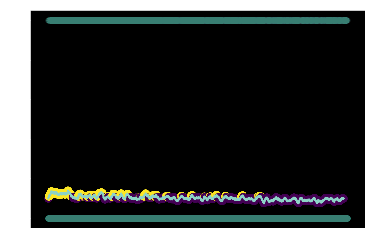

0.1090924845473976 0.09119562277654107



 52%|█████▎    | 105/200 [07:24<05:01,  3.18s/it]

var_105
var_105 0.010985415183983778


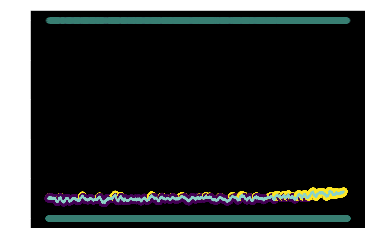

0.10879326643397325 0.09033828236130868



 53%|█████▎    | 106/200 [07:32<07:07,  4.54s/it]

var_106
var_106 0.01318338218762496


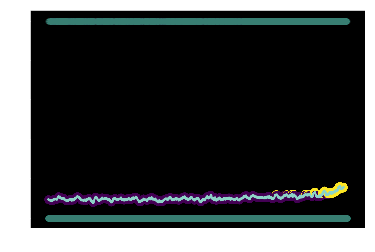

0.12418008764339744 0.0953201805412583



 54%|█████▎    | 107/200 [07:39<08:30,  5.49s/it]

var_107
var_107 0.01585896163828569


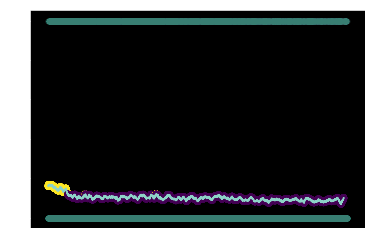

0.13983488132094943 0.09626840881408481



 54%|█████▍    | 108/200 [07:47<09:25,  6.15s/it]

var_108
var_108 0.021015305415733817


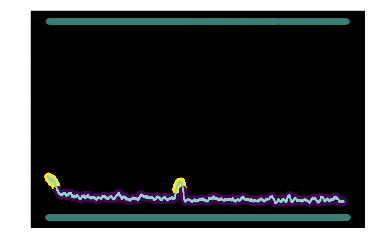

0.1667803081958271 0.0952442617112888



 55%|█████▍    | 109/200 [07:55<10:00,  6.60s/it]

var_109
var_109 0.02218084445600225


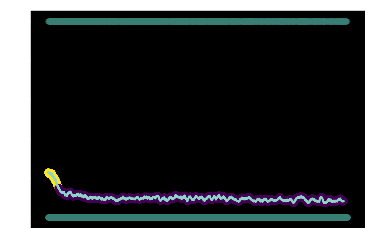

0.19638527661450297 0.09593245550632182



 55%|█████▌    | 110/200 [08:02<10:22,  6.92s/it]

var_110
var_110 0.02465565033070503


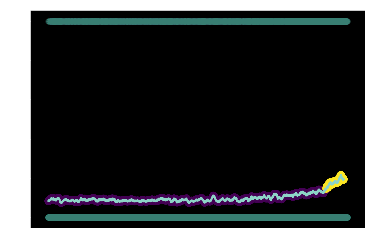

0.17732416857599112 0.09452738999013993



 56%|█████▌    | 111/200 [08:10<10:35,  7.15s/it]

var_111
var_111 0.011992803865339978


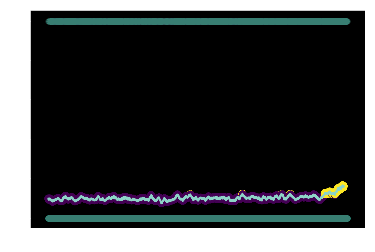

0.12786709096168947 0.09672189894370403



 56%|█████▌    | 112/200 [08:18<10:43,  7.31s/it]

var_112
var_112 0.01303438148516216


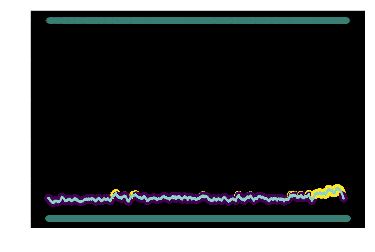

0.11902834008097166 0.09460927981032041



 56%|█████▋    | 113/200 [08:25<10:44,  7.41s/it]

var_113



 57%|█████▋    | 114/200 [08:25<07:32,  5.26s/it]

var_114
var_114 0.011329836200766177


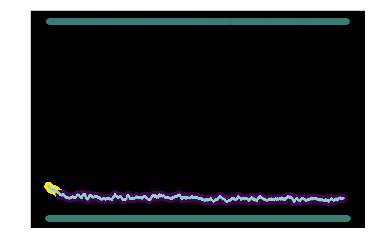

0.13415172008232873 0.09803321959698706



 57%|█████▊    | 115/200 [08:33<08:31,  6.01s/it]

var_115
var_115 0.017961475633666873


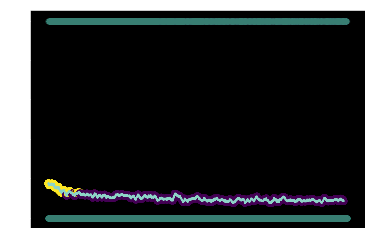

0.13803717769338397 0.09512243906620567



 58%|█████▊    | 116/200 [08:41<09:06,  6.51s/it]

var_116
var_116 0.010578677305897


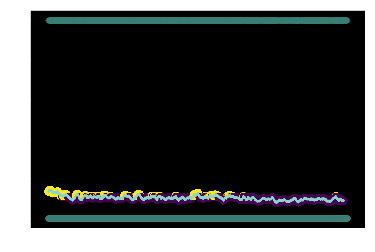

0.1100589364942719 0.09256449165402124



 58%|█████▊    | 117/200 [08:49<09:28,  6.85s/it]

var_117



 59%|█████▉    | 118/200 [08:49<06:39,  4.87s/it]

var_118
var_118 0.0155608880940676


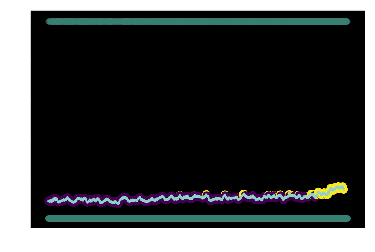

0.1208590803661538 0.09247427205774765



 60%|█████▉    | 119/200 [08:56<07:43,  5.72s/it]

var_119
var_119 0.013181011735947006


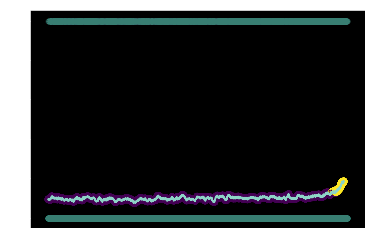

0.14489917467880542 0.09771736070163137



 60%|██████    | 120/200 [09:04<08:23,  6.30s/it]

var_120



 60%|██████    | 121/200 [09:04<05:54,  4.49s/it]

var_121
var_121 0.016914011394759204


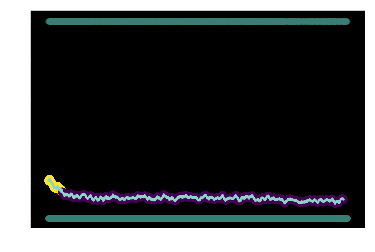

0.15903849565371653 0.09699246526710681



 61%|██████    | 122/200 [09:12<07:06,  5.47s/it]

var_122
var_122 0.01578440891258977


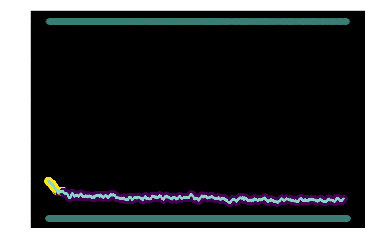

0.15052518402117276 0.09727048731034703



 62%|██████▏   | 123/200 [09:20<07:52,  6.13s/it]

var_123
var_123 0.01722352460676492


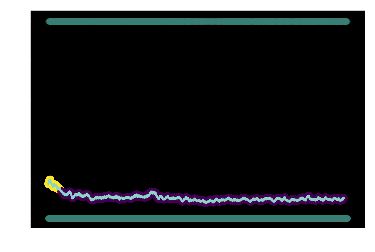

0.15772269136475076 0.09715483075555462



 62%|██████▏   | 124/200 [09:28<08:21,  6.60s/it]

var_124



 62%|██████▎   | 125/200 [09:28<05:51,  4.69s/it]

var_125
var_125 0.011729727648641703


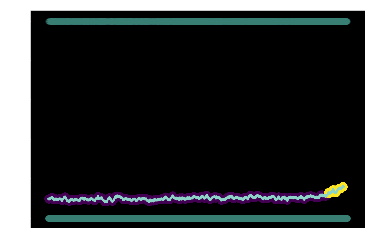

0.13762616383694545 0.09795480159599186



 63%|██████▎   | 126/200 [09:36<06:54,  5.61s/it]

var_126



 64%|██████▎   | 127/200 [09:36<04:51,  4.00s/it]

var_127
var_127 0.01626500852223718


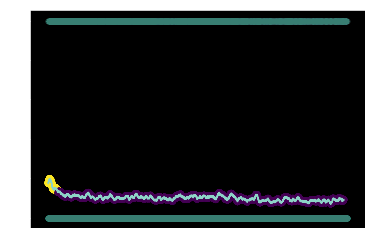

0.15724262221220997 0.09785372693881395



 64%|██████▍   | 128/200 [09:43<06:06,  5.10s/it]

var_128
var_128 0.011620339167513712


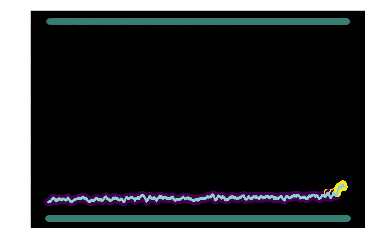

0.13397477360931437 0.09828280890253262



 64%|██████▍   | 129/200 [09:51<06:56,  5.87s/it]

var_129



 65%|██████▌   | 130/200 [09:51<04:52,  4.18s/it]

var_130
var_130 0.01353331316520094


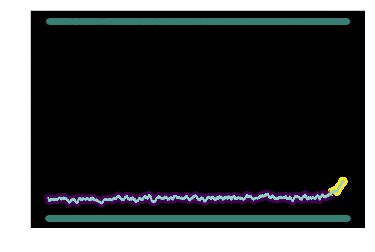

0.15023196130687988 0.09783587631472225



 66%|██████▌   | 131/200 [09:59<06:01,  5.23s/it]

var_131
var_131 0.012630370376902476


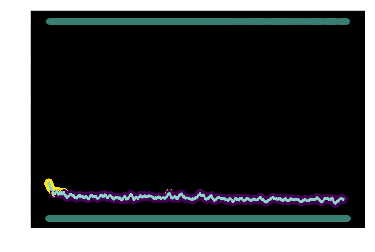

0.13207097773014173 0.09759505693044987



 66%|██████▌   | 132/200 [10:07<06:45,  5.97s/it]

var_132
var_132 0.011273701195080112


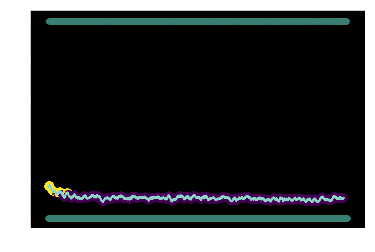

0.1315151515151515 0.09800162030785849



 66%|██████▋   | 133/200 [10:14<07:15,  6.50s/it]

var_133
var_133 0.020734044108010802


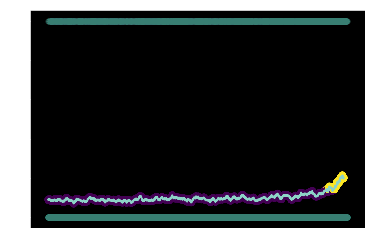

0.1669287800494271 0.09573687227761496



 67%|██████▋   | 134/200 [10:22<07:33,  6.87s/it]

var_134



 68%|██████▊   | 135/200 [10:22<05:17,  4.88s/it]

var_135
var_135 0.012003712962581995


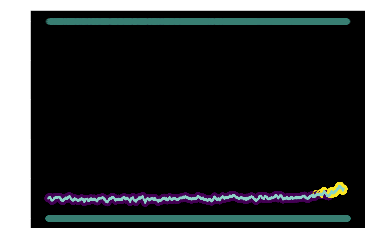

0.12961665498949054 0.09725694097256941



 68%|██████▊   | 136/200 [10:30<06:04,  5.70s/it]

var_136



 68%|██████▊   | 137/200 [10:30<04:16,  4.06s/it]

var_137
var_137 0.01171570417522594


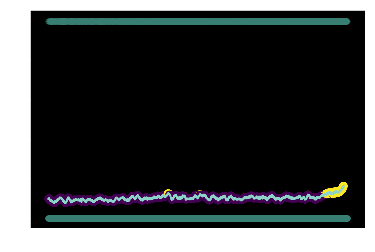

0.12554451995121102 0.09724136372879058



 69%|██████▉   | 138/200 [10:38<05:19,  5.16s/it]

var_138



 70%|██████▉   | 139/200 [10:38<03:44,  3.68s/it]

var_139
var_139 0.02801781740077171


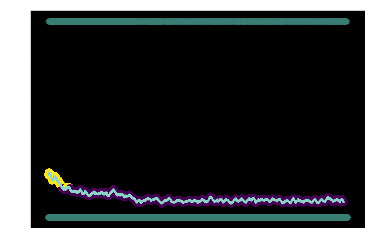

0.17714113389626054 0.09356122560244248



 70%|███████   | 140/200 [10:46<04:52,  4.87s/it]

var_140



 70%|███████   | 141/200 [10:46<03:25,  3.49s/it]

var_141
var_141 0.012842678854218439


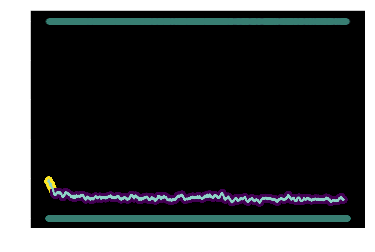

0.15823582358235824 0.09884028902774564



 71%|███████   | 142/200 [10:54<04:35,  4.74s/it]

var_142



 72%|███████▏  | 143/200 [10:54<03:13,  3.39s/it]

var_143



 72%|███████▏  | 144/200 [10:54<02:17,  2.45s/it]

var_144



 72%|███████▎  | 145/200 [10:55<01:38,  1.79s/it]

var_145
var_145 0.013191483136277637


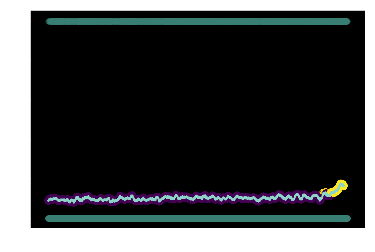

0.13873985417526483 0.0974916694525024



 73%|███████▎  | 146/200 [11:02<03:12,  3.56s/it]

var_146
var_146 0.023216346910937664


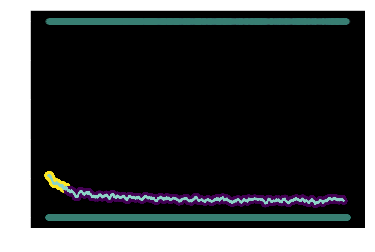

0.17253924408812235 0.09471421550359965



 74%|███████▎  | 147/200 [11:10<04:14,  4.80s/it]

var_147
var_147 0.01576917451746467


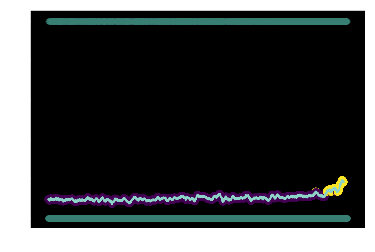

0.14576271186440679 0.09665066579882299



 74%|███████▍  | 148/200 [11:18<04:55,  5.68s/it]

var_148
var_148 0.021462214602092137


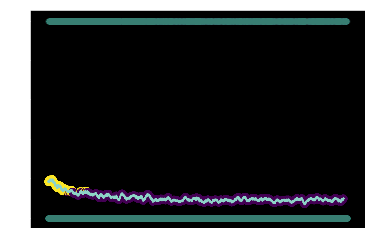

0.14738124238733252 0.09365278517780108



 74%|███████▍  | 149/200 [11:25<05:20,  6.29s/it]

var_149
var_149 0.016989749531280653


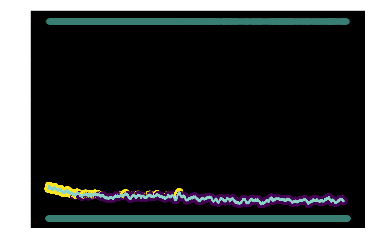

0.1206110839246391 0.09071526209437775



 75%|███████▌  | 150/200 [11:33<05:35,  6.72s/it]

var_150
var_150 0.012852787158833477


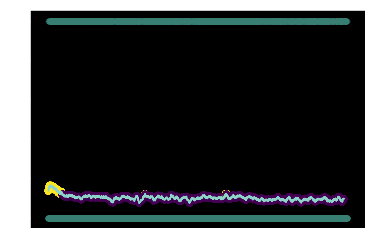

0.13250916319811146 0.09768736779715394



 76%|███████▌  | 151/200 [11:41<05:43,  7.02s/it]

var_151
var_151 0.01175821943478267


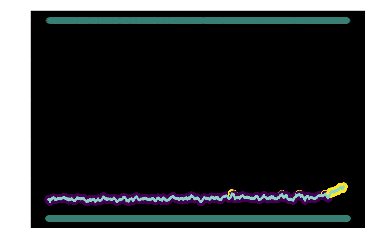

0.12710748155953636 0.0970692457003566



 76%|███████▌  | 152/200 [11:48<05:45,  7.21s/it]

var_152



 76%|███████▋  | 153/200 [11:49<04:00,  5.12s/it]

var_153



 77%|███████▋  | 154/200 [11:49<02:48,  3.66s/it]

var_154
var_154 0.01780797551832092


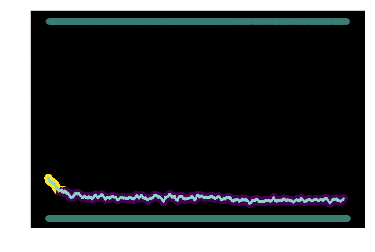

0.15853472009788927 0.09642956495688088



 78%|███████▊  | 155/200 [11:57<03:39,  4.89s/it]

var_155
var_155 0.014536017109165252


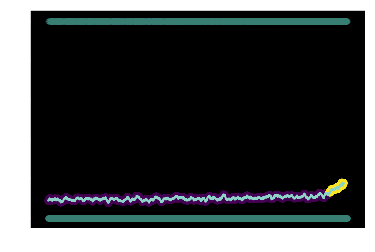

0.14450942170240416 0.09682032392611452



 78%|███████▊  | 156/200 [12:04<04:13,  5.75s/it]

var_156



 78%|███████▊  | 157/200 [12:05<02:56,  4.11s/it]

var_157
var_157 0.013578262805031896


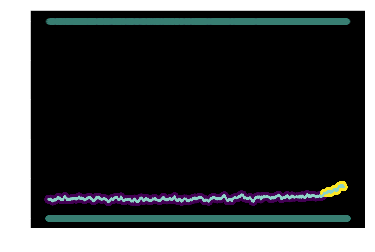

0.13976803617063102 0.09724530283264497



 79%|███████▉  | 158/200 [12:13<03:41,  5.28s/it]

var_158



 80%|███████▉  | 159/200 [12:13<02:34,  3.77s/it]

var_159



 80%|████████  | 160/200 [12:13<01:48,  2.72s/it]

var_160



 80%|████████  | 161/200 [12:14<01:17,  1.98s/it]

var_161



 81%|████████  | 162/200 [12:14<00:55,  1.46s/it]

var_162
var_162 0.013307587557241903


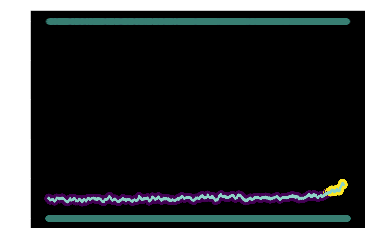

0.14102761919456874 0.09768068520835338



 82%|████████▏ | 163/200 [12:22<02:03,  3.35s/it]

var_163
var_163 0.013957450765400876


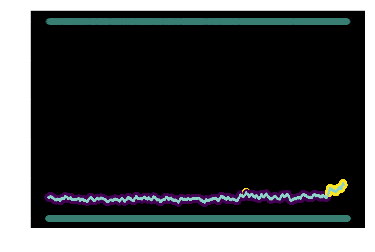

0.13982964224872232 0.09737488196411709



 82%|████████▏ | 164/200 [12:29<02:48,  4.68s/it]

var_164
var_164 0.019643582547906217


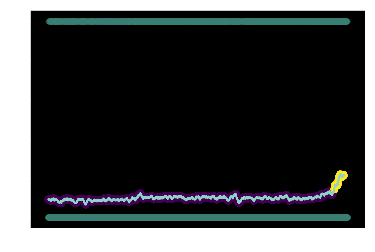

0.18425739047845185 0.09680702798352621



 82%|████████▎ | 165/200 [12:37<03:16,  5.61s/it]

var_165
var_165 0.0214134876991439


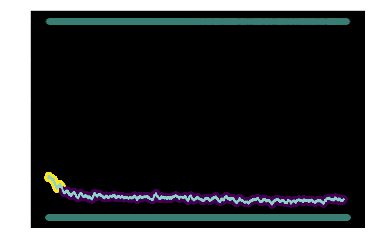

0.1733791326749678 0.09598364789891428



 83%|████████▎ | 166/200 [12:45<03:32,  6.25s/it]

var_166
var_166 0.0228771211995373


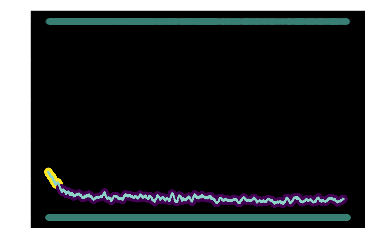

0.18945767866193614 0.0958739842743314



 84%|████████▎ | 167/200 [12:53<03:40,  6.69s/it]

var_167
var_167 0.01333428852548267


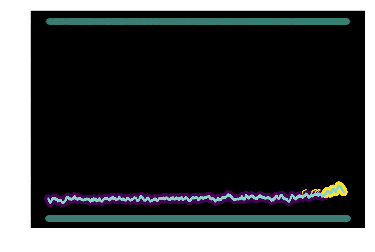

0.12868871504918286 0.09630952244255876



 84%|████████▍ | 168/200 [13:00<03:44,  7.01s/it]

var_168



 84%|████████▍ | 169/200 [13:01<02:34,  4.99s/it]

var_169
var_169 0.018384666630653294


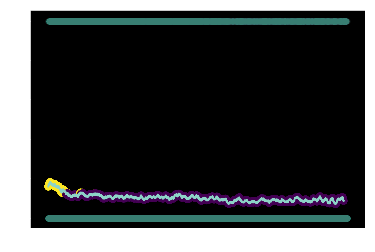

0.1417630057803468 0.09570966302164695



 85%|████████▌ | 170/200 [13:08<02:53,  5.80s/it]

var_170
var_170 0.01849030214036713


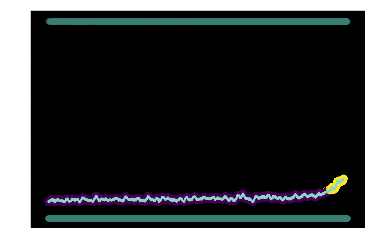

0.16235827664399094 0.09610751191304813



 86%|████████▌ | 171/200 [13:16<03:06,  6.43s/it]

var_171



 86%|████████▌ | 172/200 [13:16<02:08,  4.58s/it]

var_172
var_172 0.014990259907360132


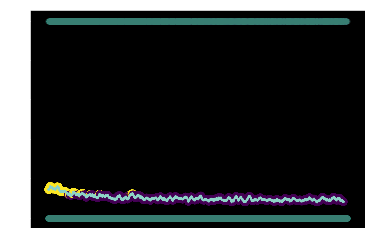

0.1274706963916341 0.0948048331638336



 86%|████████▋ | 173/200 [13:24<02:28,  5.51s/it]

var_173
var_173 0.01689672183590737


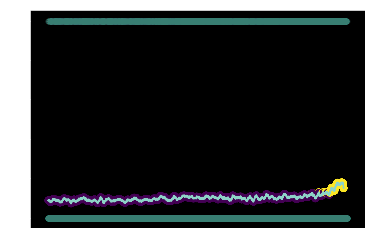

0.14015894819466249 0.0959881079636558



 87%|████████▋ | 174/200 [13:32<02:40,  6.16s/it]

var_174
var_174 0.023631874656461074


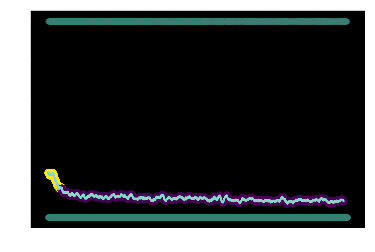

0.1872542009295674 0.0953488125754719



 88%|████████▊ | 175/200 [13:40<02:45,  6.64s/it]

var_175
var_175 0.010620943964228162


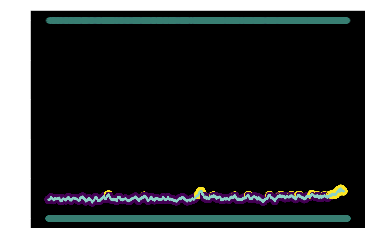

0.11571919489445262 0.09528760690927386



 88%|████████▊ | 176/200 [13:47<02:47,  6.96s/it]

var_176



 88%|████████▊ | 177/200 [13:48<01:53,  4.95s/it]

var_177
var_177 0.01892052037918048


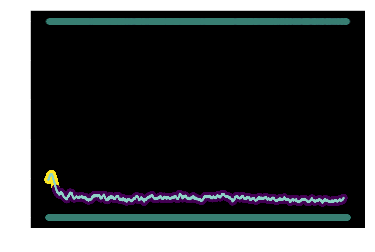

0.1872159090909091 0.09732587064676616



 89%|████████▉ | 178/200 [13:55<02:07,  5.80s/it]

var_178
var_178 0.010059798272616993


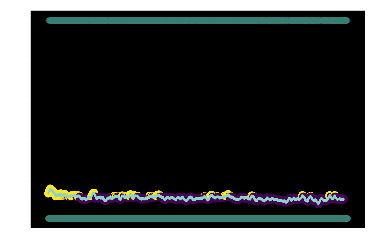

0.10916483144163984 0.09359831322058229



 90%|████████▉ | 179/200 [14:03<02:13,  6.37s/it]

var_179
var_179 0.02027137406314077


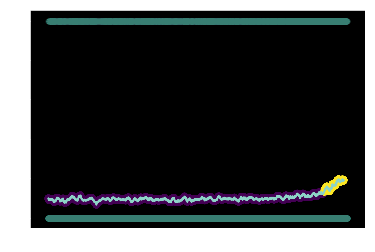

0.16386801698791245 0.09523809523809523



 90%|█████████ | 180/200 [14:11<02:15,  6.78s/it]

var_180
var_180 0.014086221934082712


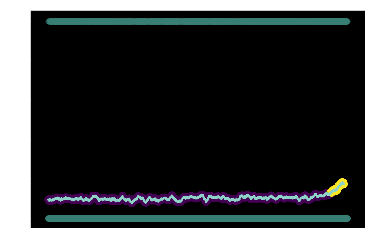

0.14543770264011116 0.09737711578969879



 90%|█████████ | 181/200 [14:18<02:14,  7.07s/it]

var_181



 91%|█████████ | 182/200 [14:19<01:30,  5.02s/it]

var_182



 92%|█████████▏| 183/200 [14:19<01:01,  3.59s/it]

var_183



 92%|█████████▏| 184/200 [14:19<00:41,  2.59s/it]

var_184
var_184 0.017450141541965503


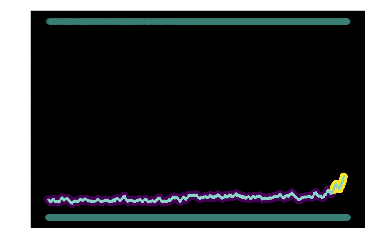

0.16036458803357098 0.09697806996649358



 92%|█████████▎| 185/200 [14:27<01:01,  4.13s/it]

var_185



 93%|█████████▎| 186/200 [14:27<00:41,  2.97s/it]

var_186
var_186 0.012929913454085448


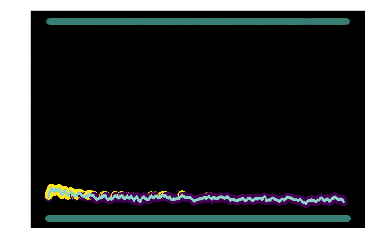

0.11547799218060285 0.0935284986233964



 94%|█████████▎| 187/200 [14:35<00:57,  4.39s/it]

var_187



 94%|█████████▍| 188/200 [14:35<00:37,  3.15s/it]

var_188
var_188 0.015378056496656115


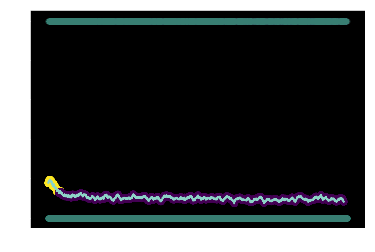

0.15681998413957177 0.09749778844938708



 94%|█████████▍| 189/200 [14:43<00:49,  4.50s/it]

var_189



 95%|█████████▌| 190/200 [14:43<00:32,  3.23s/it]

var_190
var_190 0.020843061301200765


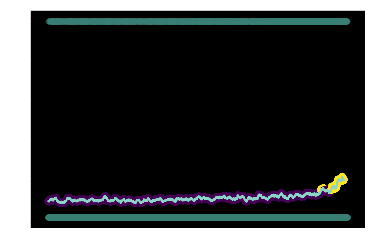

0.16171505739365294 0.09559371456342135



 96%|█████████▌| 191/200 [14:51<00:41,  4.59s/it]

var_191
var_191 0.017805511298339436


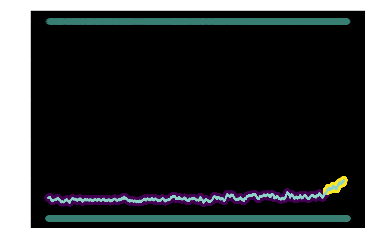

0.1582739156268568 0.09631920916069821



 96%|█████████▌| 192/200 [14:59<00:44,  5.55s/it]

var_192
var_192 0.015731030531669327


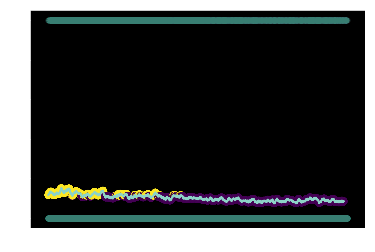

0.11697514677854667 0.08991060654566947



 96%|█████████▋| 193/200 [15:06<00:43,  6.21s/it]

var_193



 97%|█████████▋| 194/200 [15:07<00:26,  4.43s/it]

var_194
var_194 0.01009855831412518


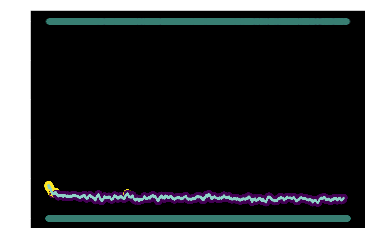

0.13086395621579358 0.09885228278740357



 98%|█████████▊| 195/200 [15:14<00:27,  5.41s/it]

var_195
var_195 0.01229298099219544


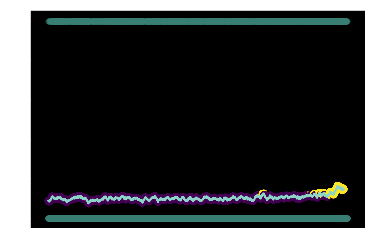

0.1240746116998113 0.09672125443622277



 98%|█████████▊| 196/200 [15:22<00:24,  6.11s/it]

var_196
var_196 0.011199363547148594


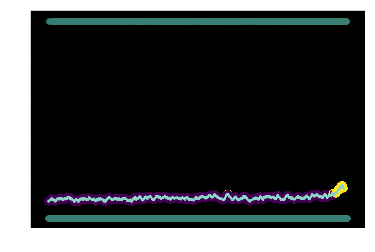

0.13299649580311304 0.09836519663983721



 98%|█████████▊| 197/200 [15:30<00:19,  6.59s/it]

var_197
var_197 0.014021412736087379


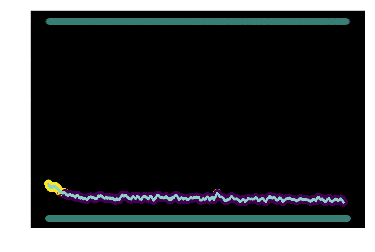

0.14206606835974794 0.09694555833500643



 99%|█████████▉| 198/200 [15:38<00:13,  6.93s/it]

var_198
var_198 0.02070012600875582


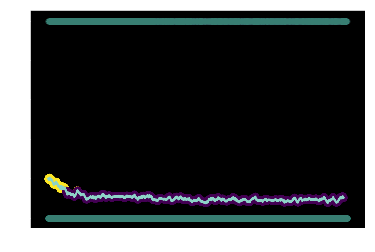

0.16281363664385673 0.09498909015719968



100%|█████████▉| 199/200 [15:45<00:07,  7.18s/it]

var_199
var_199 0.011496700553862758


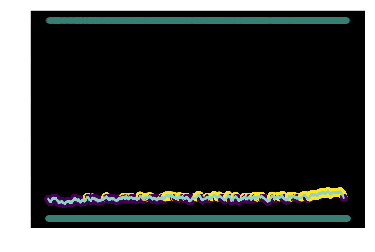

0.10548347730046292 0.08675430864730041



100%|██████████| 200/200 [15:53<00:00,  7.33s/it]


In [12]:
interesting_ranges_all = dict()

conv_size = 2000
for col in tm([f'var_{i}' for i in range(200)]):
    print(col)
    signal = np.convolve(train.sort_values(col)['target'].values, np.ones((conv_size,))/conv_size, mode='valid')
    if (signal.std() <= 0.01):
        continue
    print(col, signal.std())
    is_peak = signal > (signal.max() + signal.min()) / 2
    plot(signal)
    scatter(np.arange(198001), signal, c=is_peak)
    scatter(np.arange(200000), train.sort_values(col)['target'].values, alpha=0.01)

    show()
    
    mask = invert_peaks(is_peak, conv_size)
    print(train.sort_values(col)['target'][mask].mean(), train.sort_values(col)['target'][~mask].mean())
    good_vals = train.sort_values(col)[col][mask]
    
    interesting_ranges_all[col] = good_vals

In [14]:
bad = [ # 106?
    20, 23, 24, 28, 31, 36, 48, 51, 52, 58, 67, 70, 
    71, 87, 88, 104, 105, 106, 112, 116, 118, 135, 
    137, 149, 150, 151, 172, 175, 178, 186, 192, 
    195, 199
]

interesting_filtered = {
    key: value for key, value 
    in interesting_ranges_all.items()
    if int(key[4:]) not in bad
}

In [15]:
len(interesting_ranges_all), len(interesting_filtered)

(120, 87)

In [16]:
kts.cache.cache_obj(interesting_filtered, 'interesting_filtered')

In [17]:
@register
def peak_encoding(df):
    int_filtered = kts.cache.load_obj('interesting_filtered')
    
    res = stl.empty_like(df)
    for col in int_filtered:
        res[f'pe_{col}'] = df[col].isin(int_filtered[col])
        
    return res